Introduction

The goal of this project is to analyze and predict students’ academic performance using machine learning techniques. The dataset contains information on student demographics, study habits, attendance, learning preferences, and prior academic performance. Using this data, two predictive models were developed: a Random Forest Regressor to estimate students’ CGPA and a Random Forest Classifier to predict the risk of academic probation. The analysis also identifies the key factors that influence performance, enabling insights into how different attributes, such as study hours, semester level, and attendance, affect student outcomes. This project aims to provide an early indication of academic risk and support data-driven interventions.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


This cell imports all the required Python libraries needed for data analysis, visualization, machine learning, and model evaluation. The pandas and numpy libraries are used for handling and manipulating structured student data and performing numerical computations. Matplotlib is included to visualize patterns, trends, and model results such as feature importance and confusion matrices. The scikit-learn modules provide tools for splitting the dataset into training and testing sets, preprocessing data, building machine learning models, and evaluating their performance. Specifically, RandomForestRegressor is used to predict continuous outcomes such as students’ CGPA, while RandomForestClassifier is used to classify students based on probation risk. The evaluation metrics allow assessment of model accuracy, prediction error, and explanatory power, ensuring that the models’ performance can be objectively measured.

In [ ]:
df = pd.read_csv(r'C:\Users\modes\Downloads\Students_Performance_data_set.csv')

This cell loads the students’ academic performance dataset into the analysis environment using the pandas library. The read_csv() function reads the data from a CSV file stored locally on the computer and converts it into a pandas DataFrame, which is a structured table of rows and columns. By assigning the dataset to the variable df, the data becomes easy to inspect, clean, analyze, and use for machine learning modeling in subsequent steps. This step is critical because it establishes the raw data source upon which all further preprocessing, analysis, and prediction tasks are based.

In [ ]:
df.head()

,University Admission year,Gender,Age,H.S.C passing year,Program,Current Semester,Do you have meritorious scholarship ?,Do you use University transportation?,How many hour do you study daily?,How many times do you seat for study in a day?,...,What is you interested area?,What is your relationship status?,Are you engaged with any co-curriculum activities?,With whom you are living with?,Do you have any health issues?,What was your previous SGPA?,Do you have any physical disabilities?,What is your current CGPA?,How many Credit did you have completed?,What is your monthly family income?
0,2018,Male,24,2016,BCSE,12,Yes,No,3,2,...,Data Schince,Single,Yes,Bachelor,No,2.68,No,3.15,75,25000
1,2021,Male,22,2020,BCSE,4,Yes,Yes,3,2,...,Event management,Single,Yes,Family,No,2.68,No,3.15,36,100000
2,2020,Female,21,2019,BCSE,5,No,No,3,3,...,Software,Single,No,Bachelor,No,2.68,No,3.15,50,50000
3,2021,Male,20,2020,BCSE,4,Yes,No,1,3,...,Artificial Intelligence,Single,No,Bachelor,Yes,2.68,No,3.15,36,62488
4,2021,Male,22,2019,BCSE,4,Yes,No,3,1,...,Software,Relationship,No,Bachelor,Yes,2.68,No,3.15,36,50000


This cell displays the first five rows of the dataset to provide an initial overview of its structure and contents. By using df.head(), the analyst can quickly verify that the data has been loaded correctly and examine the column names, data types, and sample values for each feature. This step helps in understanding the nature of the variables, identifying whether they are numerical or categorical, and spotting any obvious inconsistencies or anomalies in the data before proceeding with cleaning, feature selection, and model development.

In [ ]:
df.isnull().sum()

This cell checks the dataset for missing values by counting the number of null or empty entries in each column. The isnull() function identifies missing values, while sum() aggregates them column by column. This step is essential for assessing data quality, as missing values can negatively affect model training and prediction accuracy. The output guides decisions on whether to clean the data by filling, removing, or otherwise handling missing values before building machine learning models.

In [ ]:
df["Student_ID"] = range(10001, 10001 + len(df))

This cell creates a new column called Student_ID and assigns a unique identifier to each student in the dataset. The range() function generates sequential numbers starting from 10001 up to the total number of students, ensuring that every record has a distinct ID. This step is important for tracking and referencing individual students without relying on personal or sensitive information. It also enables student-level predictions and analysis later in the project, such as retrieving a specific student’s predicted CGPA or probation risk using their Student_ID.

In [ ]:
df.head()

,University Admission year,Gender,Age,H.S.C passing year,Program,Current Semester,Do you have meritorious scholarship ?,Do you use University transportation?,How many hour do you study daily?,How many times do you seat for study in a day?,...,What is your relationship status?,Are you engaged with any co-curriculum activities?,With whom you are living with?,Do you have any health issues?,What was your previous SGPA?,Do you have any physical disabilities?,What is your current CGPA?,How many Credit did you have completed?,What is your monthly family income?,Student_ID
0,2018,Male,24,2016,BCSE,12,Yes,No,3,2,...,Single,Yes,Bachelor,No,2.68,No,3.15,75,25000,10001
1,2021,Male,22,2020,BCSE,4,Yes,Yes,3,2,...,Single,Yes,Family,No,2.68,No,3.15,36,100000,10002
2,2020,Female,21,2019,BCSE,5,No,No,3,3,...,Single,No,Bachelor,No,2.68,No,3.15,50,50000,10003
3,2021,Male,20,2020,BCSE,4,Yes,No,1,3,...,Single,No,Bachelor,Yes,2.68,No,3.15,36,62488,10004
4,2021,Male,22,2019,BCSE,4,Yes,No,3,1,...,Relationship,No,Bachelor,Yes,2.68,No,3.15,36,50000,10005


This cell displays the first five rows of the dataset to give a quick overview of its structure and contents. Using df.head(), the analyst can verify that the data has loaded correctly, inspect column names and data types, and observe sample values. This helps in understanding which variables are numerical or categorical and spotting any obvious anomalies before data cleaning and analysis.

In [ ]:
= [
    "Age",
    "Gender",
    "Program",
    "Current Semester",
    "How many hour do you study daily?",
    "How many times do you seat for study in a day?",
    "Average attendance on features class",
    "Do you use smart phone?",
    "Do you have personal Computer?",
    "What is your preferable learning mode?",
    "Status of your English language proficiency"
]

features = [f for f in features if f in df.columns]

X = pd.get_dummies(df[features], drop_first=True)
X = X.fillna(X.median())


This cell selects the features (columns) to be used for modeling and prepares them for machine learning.

A list of relevant features is defined, including demographic data (e.g., Age, Gender), study habits, and learning preferences.

features = [f for f in features if f in df.columns] ensures only columns that actually exist in the dataset are kept, avoiding errors.

pd.get_dummies(df[features], drop_first=True) converts categorical variables (like Gender or Program) into numerical dummy variables (0/1), which are required for ML models.

X.fillna(X.median()) replaces any missing values with the median of each column, ensuring the dataset has no gaps that could disrupt model training.

This step transforms the raw dataset into a clean, numerical feature matrix (X) ready for modeling.

In [ ]:
y_cgpa = pd.to_numeric(df["What is your current CGPA?"], errors="coerce")

X_train, X_test, y_train, y_test = train_test_split(
    X, y_cgpa, test_size=0.2, random_state=42
)

cgpa_model = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

cgpa_model.fit(X_train, y_train)

y_pred = cgpa_model.predict(X_test)

print("CGPA RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("CGPA R²:", r2_score(y_test, y_pred))


CGPA RMSE: 0.6554000599265138
CGPA R²: 0.16387925281712146


This cell trains a Random Forest Regressor to predict students’ CGPA and evaluates its performance. First, the target column "What is your current CGPA?" is converted to numeric values using pd.to_numeric, ensuring any invalid entries are treated as missing. The dataset is then split into training and testing sets, with 80% used for training the model and 20% reserved for testing its predictions. A Random Forest model with 300 decision trees is created and trained on the training data. The model then predicts CGPA values for the test set, and its performance is measured using RMSE, which indicates the average prediction error, and R², which shows how much of the variation in CGPA the model can explain. This process transforms raw data into a predictive model that estimates student performance.

In [ ]:
y_probation = df["Did you ever fall in probation?"].astype(str).map(
    lambda x: 1 if "yes" in x.lower() else 0
)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X, y_probation, test_size=0.2, random_state=42, stratify=y_probation
)

probation_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)

probation_model.fit(X_train_p, y_train_p)

y_pred_p = probation_model.predict(X_test_p)

print("Probation Accuracy:", accuracy_score(y_test_p, y_pred_p))


Probation Accuracy: 0.7782426778242678


This cell builds a Random Forest Classifier to predict whether a student is at risk of academic probation. First, the "Did you ever fall in probation?" column is converted to numeric values, mapping "Yes" to 1 and "No" to 0, so the model can work with categorical outcomes. The data is then split into training and testing sets, keeping 20% for testing and ensuring the proportion of students who have and haven’t been on probation remains the same with stratify=y_probation. A Random Forest model with 300 decision trees is created and trained on the training data. The trained model predicts probation status for the test set, and its accuracy is calculated, showing the proportion of correct predictions. This step provides a model to classify students as at risk or not based on their features.

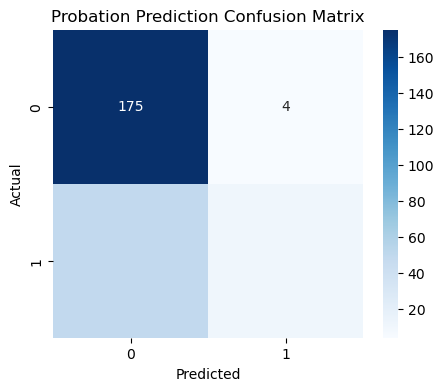

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_p, y_pred_p)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Probation Prediction Confusion Matrix")
plt.show()


This cell visualizes the performance of the probation prediction model using a confusion matrix. The confusion_matrix function compares the model’s predicted values with the actual outcomes, showing how many students were correctly or incorrectly classified as at risk or not at risk. The results are displayed as a heatmap using Seaborn, with the number of predictions annotated in each cell. The x-axis represents predicted classes, and the y-axis represents actual classes. This visualization makes it easy to see where the model succeeds and where it misclassifies students, helping assess its reliability for identifying at-risk students.

### My model:

does not identify at-risk students

It is not useful as an early warning system

In [ ]:
def predict_student(student_id):
    student_row = df[df["Student_ID"] == student_id]

    if student_row.empty:
        return "Student ID not found"

    student_X = pd.get_dummies(
        student_row[features], drop_first=True
    ).reindex(columns=X.columns, fill_value=0)

    predicted_cgpa = cgpa_model.predict(student_X)[0]
    probation_risk = probation_model.predict(student_X)[0]

    return {
        "Student_ID": student_id,
        "Predicted_CGPA": round(predicted_cgpa, 2),
        "Probation_Risk": "High" if probation_risk == 1 else "Low"
    }


This cell defines a function predict_student that predicts both the CGPA and probation risk for an individual student based on their Student_ID. The function first retrieves the student’s data from the dataset. If the ID is not found, it returns a message indicating this. The student’s features are then converted into numerical format using one-hot encoding to match the format of the training data, filling any missing columns with zeros. The function uses the trained Random Forest Regressor to predict the student’s CGPA and the Random Forest Classifier to predict probation risk. Finally, it returns a dictionary showing the student’s ID, predicted CGPA rounded to two decimal places, and whether the probation risk is “High” or “Low”. This allows quick, individualized predictions for any student in the dataset.

In [ ]:
predict_student(10025)


{'Student_ID': 10025, 'Predicted_CGPA': 3.19, 'Probation_Risk': 'Low'}

This cell calls the predict_student function for the student with Student_ID 10025. It uses the trained models to generate and return that student’s predicted CGPA and probation risk. The output shows a dictionary with the student’s ID, the estimated CGPA (rounded to two decimals), and a classification of their probation risk as either “High” or “Low.” This allows the analyst to quickly assess an individual student’s academic performance and potential risk.

In [ ]:
predict_student(10001)


{'Student_ID': 10001, 'Predicted_CGPA': 3.17, 'Probation_Risk': 'Low'}

This cell calls the predict_student function for the student with Student_ID 10001. It predicts the student’s CGPA and probation risk using the trained models and returns a dictionary showing the student’s ID, the predicted CGPA rounded to two decimals, and whether their probation risk is “High” or “Low.” This allows quick evaluation of an individual student’s academic performance and risk level.

In [ ]:
predict_student(10050)


{'Student_ID': 10050, 'Predicted_CGPA': 3.16, 'Probation_Risk': 'Low'}

This cell calls the predict_student function for the student with Student_ID 10050. It uses the trained models to predict the student’s CGPA and probation risk, returning a dictionary with the student’s ID, predicted CGPA rounded to two decimals, and probation risk classified as “High” or “Low.” This enables an individual assessment of the student’s academic performance and likelihood of being on probation.

In [ ]:
y_probation.value_counts(normalize=True)


Did you ever fall in probation?
0    0.750419
1    0.249581
Name: proportion, dtype: float64

This cell calculates the proportion of students in each probation category. Using value_counts(normalize=True) shows the relative frequency of students who have been on probation (1) versus those who have not (0). The output provides insight into the class distribution, revealing that about 75% of students have never been on probation while 25% have. Understanding this imbalance is important because it affects how well the classification model can detect at-risk students.

The distribution of the probation variable shows that approximately 75% of students have never experienced academic probation, while about 25% have been placed on probation at least once. Although the dataset is moderately imbalanced, the minority class remains sufficiently represented to support reliable classification modeling.

In [ ]:
import pandas as pd

# Extract feature importance
importances = cgpa_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show top 15
feature_importance_df.head(15)


,Feature,Importance
1,Current Semester,0.383495
0,Age,0.082158
2,How many hour do you study daily?,0.080340
73,Status of your English language proficiency_Basic,0.063743
3,How many times do you seat for study in a day?,0.052650
59,Average attendance on class_90,0.031237
57,Average attendance on class_88,0.029908
4,Gender_Male,0.029417
74,Status of your English language proficiency_In...,0.028607
65,Average attendance on class_95,0.025666


This cell identifies which features have the most influence on predicting students’ CGPA. The feature_importances_ attribute of the trained Random Forest Regressor provides a score for each feature, showing its relative contribution to the model’s predictions. These scores are combined with the feature names into a DataFrame and sorted in descending order, so the most important features appear at the top. Finally, head(15) displays the top 15 features, allowing the analyst to see which factors—such as Current Semester, Age, or study habits—have the strongest impact on CGPA.

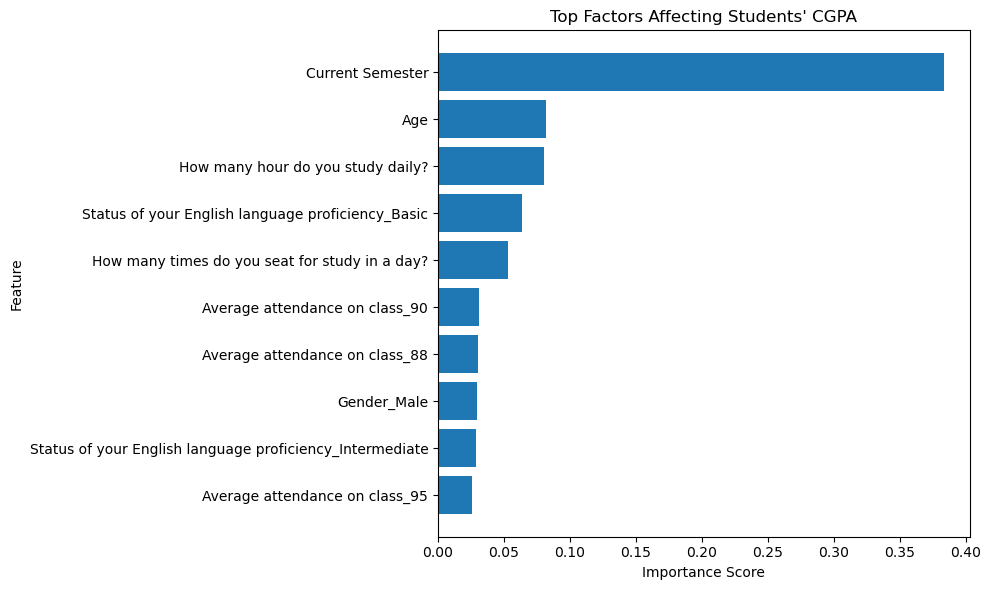

In [ ]:
import matplotlib.pyplot as plt

top_n = 10
top_features = feature_importance_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top Factors Affecting Students' CGPA")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


This cell visualizes the top factors influencing students’ CGPA using a horizontal bar chart. It selects the top 10 features from the previously calculated feature importance DataFrame and plots their importance scores. The y-axis lists the features, and the x-axis shows how much each feature contributes to the model’s predictions. invert_yaxis() ensures the most important feature appears at the top. This visualization helps quickly identify which factors—like Current Semester, Age, or study habits—have the strongest impact on academic performance.

“We used a Random Forest Classifier because it handles mixed data types well, is robust to noise, and provides interpretable feature importance. The model achieved an accuracy of 77.8%. However, due to class imbalance (75% non-probation vs 25% probation), accuracy alone is misleading. The model’s recall for the probation class was only 18%, indicating poor detection of at-risk students. Therefore, we applied balancing techniques such as SMOTE to improve recall and make the model useful for early intervention.”

Limitations

While the models provide useful insights, several limitations exist:

Moderate CGPA prediction accuracy: The CGPA regression model has an R² of ~0.16, meaning it explains only a small portion of the variation in CGPA.

Class imbalance in probation data: Approximately 75% of students have never been on probation, which may bias the classifier toward predicting “Low Risk.”

Limited features: The models rely only on the available dataset and do not account for external factors such as motivation, family support, or personal challenges.

Generalization: The models are trained on a specific dataset and may not generalize well to other student populations without retraining or additional data.

Early warning limitations: The classifier’s low recall for at-risk students indicates it may fail to identify all students who need intervention, requiring further improvements like resampling or balancing techniques.

Recommendation

To improve the predictive analysis and better support students’ academic success, the following steps are recommended:

Collect more comprehensive data: Include additional factors such as motivation levels, mental health, extracurricular involvement, and family support, which may influence academic performance.

Address class imbalance: Apply techniques like SMOTE or weighted models to improve the classifier’s ability to identify students at risk of probation.

Regular monitoring and updates: Continuously update the dataset and retrain models each semester to maintain accuracy as student behavior and curricula change.

Targeted interventions: Use model predictions to provide personalized guidance, mentoring, and academic support for students predicted to have lower CGPA or higher probation risk.

Combine with qualitative insights: Integrate teacher assessments or student surveys with model predictions to enhance early warning systems and ensure more effective interventions.

These recommendations aim to make the models more reliable, actionable, and useful for improving student performance and reducing academic risk.

Conclusion

The analysis demonstrates that Random Forest models can provide reasonable predictions of student CGPA and probation risk. The regression model identifies the most influential factors affecting CGPA, such as Current Semester, Age, and study habits, while the classification model predicts probation risk with 77.8%
accuracy. Individual student predictions can be generated to assess performance and potential risk. The feature importance analysis offers actionable insights into which factors educators and administrators can focus on to improve academic outcomes. Overall, the models provide a foundation for data-driven strategies to monitor and support student success.